## Sentiment Analysis on US Airline Reviews

In [1]:
#!pip install tensorflow

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

df = pd.read_csv("C:/Users/bablu/Twitter_Data.csv", nrows= 6000)
df.dropna(inplace= True)
df['category']=df['category'].astype(int)

In [3]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


In [4]:
df.columns

Index(['clean_text', 'category'], dtype='object')

In [5]:
tweet_df = df[['clean_text','category']]
print(tweet_df.shape)
tweet_df.head(5)

(5999, 2)


,clean_text,category
0,when modi promised “minimum government maximum...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


In [6]:
tweet_df = tweet_df[tweet_df['category'] != 0]
print(tweet_df.shape)
tweet_df.head(5)

(3867, 2)


,clean_text,category
0,when modi promised “minimum government maximum...,-1
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1
8,with upcoming election india saga going import...,1


In [7]:
import numpy as np
import re
def remove_pattern(input_text, pattern):
    r = re.findall(pattern, input_text)
    for word in r:
        input_text = re.sub(word, "", input_text)
    return input_text
# remove twitter handles (@user)
tweet_df['clean_tweet'] = np.vectorize(remove_pattern)(tweet_df['clean_text'], "@[\w]*")
# remove special characters, numbers and punctuations
tweet_df['clean_tweet']=tweet_df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
# remove shorter words
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))
tweet_df.head()

C:\Users\bablu\AppData\Local\Temp\ipykernel_10384\4235791698.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df['clean_tweet']=tweet_df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")


,clean_text,category,clean_tweet
0,when modi promised “minimum government maximum...,-1,when modi promised minimum government maximum ...
2,what did just say vote for modi welcome bjp t...,1,what just vote modi welcome told rahul main ca...
3,asking his supporters prefix chowkidar their n...,1,asking supporters prefix chowkidar their names...
4,answer who among these the most powerful world...,1,answer among these most powerful world leader ...
8,with upcoming election india saga going import...,1,with upcoming election india saga going import...


In [8]:
tweet_df["clean_tweet"].value_counts()

development become mass movement under modi govt with economic social political empowerment life witnessed positive paradigm shift this india namo                                                              3
governor kalyan singh says must important nation have modi                                                                                                                                                      3
struggles find candidates west bengal graffiti shows modi asking contest                                                                                                                                        3
foundation india already been laid modi govt with vision housing health education india realising aspirations towards prosperous future namo                                                                    3
will give modi whistle wants chowkidar akbaruddin owaisi                                                                                                        

In [9]:
sentiment_label = tweet_df.clean_tweet.factorize()
sentiment_label

(array([   0,    1,    2, ..., 3809, 3810, 3811], dtype=int64),
 Index(['when modi promised minimum government maximum governance expected begin difficult reforming state does take years justice state should business should exit psus temples',
        'what just vote modi welcome told rahul main campaigner modi think modi should just relax',
        'asking supporters prefix chowkidar their names modi great service there confusion what read what crustal clear what will crass filthy nonsensical most abuses coming from chowkidars',
        'answer among these most powerful world leader today trump putin modi',
        'with upcoming election india saga going important pair look current modi leads govt elected with deal brexit combination this weekly looks juicy bears imho',
        'gandhi does modi',
        'things like demonetisation goods services upper castes would sort either view favourably that need give this more time other castes like dalits muslims were more against because th

In [10]:
tweet = tweet_df.clean_tweet.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [11]:
print(tokenizer.word_index)

{'modi': 1, 'will': 2, 'this': 3, 'india': 4, 'that': 5, 'with': 6, 'have': 7, 'from': 8, 'people': 9, 'like': 10, 'congress': 11, 'they': 12, 'your': 13, 'vote': 14, 'only': 15, 'what': 16, 'govt': 17, 'rahul': 18, 'more': 19, 'country': 20, 'money': 21, 'poor': 22, 'dont': 23, 'narendra': 24, 'years': 25, 'their': 26, 'just': 27, 'time': 28, 'about': 29, 'than': 30, 'even': 31, 'should': 32, 'indian': 33, 'after': 34, 'modis': 35, 'when': 36, 'which': 37, 'good': 38, 'give': 39, 'power': 40, 'chowkidar': 41, 'election': 42, 'every': 43, 'there': 44, 'also': 45, 'then': 46, 'gandhi': 47, 'government': 48, 'party': 49, 'want': 50, 'make': 51, 'again': 52, 'against': 53, 'under': 54, 'would': 55, 'been': 56, 'better': 57, 'them': 58, 'know': 59, 'where': 60, 'first': 61, 'much': 62, 'these': 63, 'being': 64, 'other': 65, 'many': 66, 'nation': 67, 'year': 68, 'elections': 69, 'think': 70, 'right': 71, 'such': 72, 'scheme': 73, 'great': 74, 'minister': 75, 'said': 76, 'some': 77, 'fake': 

In [12]:
print(tweet[0])
print(encoded_docs[0])

when modi promised minimum government maximum governance expected begin difficult reforming state does take years justice state should business should exit psus temples
[36, 1, 105, 172, 48, 1478, 470, 633, 2513, 1145, 4831, 148, 140, 79, 25, 606, 148, 32, 370, 32, 3261, 3262, 2037]


In [13]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0   36    1  105  172   48
 1478  470  633 2513 1145 4831  148  140   79   25  606  148   32  370
   32 

In [14]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           356128    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 372,779
Trainable params: 372,779
Non-trainable params: 0
__________________________________________________

In [15]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
97/97 [==============================] - 44s 352ms/step - loss: -15557.4316 - accuracy: 3.2331e-04 - val_loss: -51975.1719 - val_accuracy: 0.0000e+00
Epoch 2/5
97/97 [==============================] - 33s 344ms/step - loss: -23040.5820 - accuracy: 3.2331e-04 - val_loss: -51975.1719 - val_accuracy: 0.0000e+00
Epoch 3/5
97/97 [==============================] - 33s 337ms/step - loss: -23040.5840 - accuracy: 3.2331e-04 - val_loss: -51975.1719 - val_accuracy: 0.0000e+00
Epoch 4/5
97/97 [==============================] - 33s 343ms/step - loss: -23040.5820 - accuracy: 3.2331e-04 - val_loss: -51975.1719 - val_accuracy: 0.0000e+00
Epoch 5/5
97/97 [==============================] - 34s 349ms/step - loss: -23040.5879 - accuracy: 3.2331e-04 - val_loss: -51975.1719 - val_accuracy: 0.0000e+00


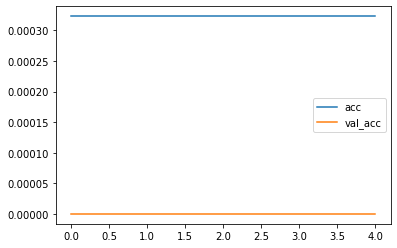

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

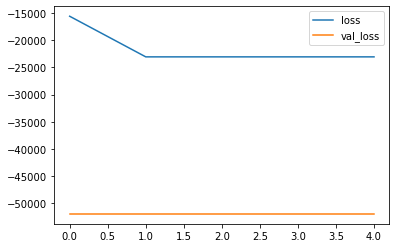

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [18]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [19]:
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

1/1 [==============================] - 1s 870ms/step
Predicted label:  with upcoming election india saga going important pair look current modi leads govt elected with deal brexit combination this weekly looks juicy bears imho
1/1 [==============================] - 0s 83ms/step
Predicted label:  with upcoming election india saga going important pair look current modi leads govt elected with deal brexit combination this weekly looks juicy bears imho
